In [1]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Dataset3')

Found 4379 files belonging to 2 classes.


In [4]:
data_iterator = data.as_numpy_iterator()

In [5]:
batch = data_iterator.next()

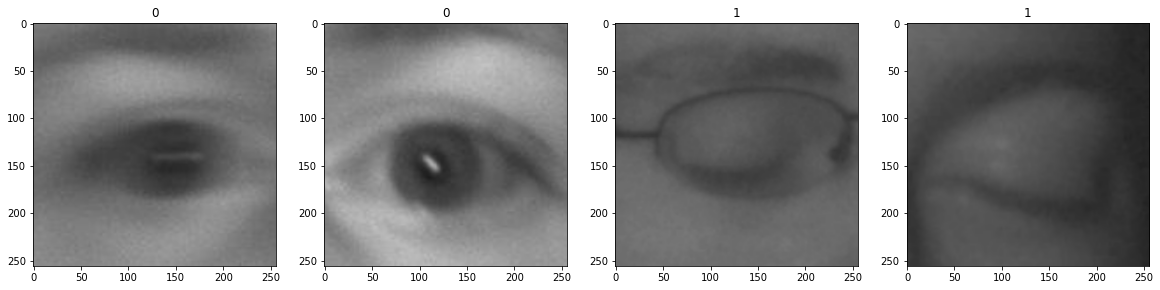

In [6]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [7]:
data = data.map(lambda x,y: (x/255, y))

In [8]:
data.as_numpy_iterator().next();

(array([[[[0.34509805, 0.34509805, 0.34509805],
          [0.34402573, 0.34402573, 0.34402573],
          [0.34200367, 0.34200367, 0.34200367],
          ...,
          [0.44705883, 0.44705883, 0.44705883],
          [0.44705883, 0.44705883, 0.44705883],
          [0.44705883, 0.44705883, 0.44705883]],
 
         [[0.34617034, 0.34617034, 0.34617034],
          [0.34539124, 0.34539124, 0.34539124],
          [0.3439221 , 0.3439221 , 0.3439221 ],
          ...,
          [0.4459865 , 0.4459865 , 0.4459865 ],
          [0.4459865 , 0.4459865 , 0.4459865 ],
          [0.4459865 , 0.4459865 , 0.4459865 ]],
 
         [[0.3481924 , 0.3481924 , 0.3481924 ],
          [0.34796622, 0.34796622, 0.34796622],
          [0.3475397 , 0.3475397 , 0.3475397 ],
          ...,
          [0.44396445, 0.44396445, 0.44396445],
          [0.44396445, 0.44396445, 0.44396445],
          [0.44396445, 0.44396445, 0.44396445]],
 
         ...,
 
         [[0.39607844, 0.39607844, 0.39607844],
          [0.39760

In [9]:
train_size = int(len(data)*.6)
val_size = int(len(data)*.2)
test_size = int(len(data)*.2)

In [10]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [11]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
model = Sequential()

In [13]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [14]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [16]:
logdir='logs'

In [17]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [18]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
82/82 [==============================] - 774s 9s/step - loss: 0.3787 - accuracy: 0.8220 - val_loss: 0.1535 - val_accuracy: 0.9444
Epoch 2/20
82/82 [==============================] - 17s 208ms/step - loss: 0.1230 - accuracy: 0.9577 - val_loss: 0.0948 - val_accuracy: 0.9688
Epoch 3/20
82/82 [==============================] - 17s 207ms/step - loss: 0.0756 - accuracy: 0.9748 - val_loss: 0.0624 - val_accuracy: 0.9745
Epoch 4/20
82/82 [==============================] - 15s 180ms/step - loss: 0.0566 - accuracy: 0.9840 - val_loss: 0.0200 - val_accuracy: 0.9965
Epoch 5/20
82/82 [==============================] - 16s 186ms/step - loss: 0.0753 - accuracy: 0.9745 - val_loss: 0.0403 - val_accuracy: 0.9896
Epoch 6/20
82/82 [==============================] - 15s 179ms/step - loss: 0.0450 - accuracy: 0.9863 - val_loss: 0.0408 - val_accuracy: 0.9815
Epoch 7/20
82/82 [==============================] - 14s 171ms/step - loss: 0.0366 - accuracy: 0.9878 - val_loss: 0.0430 - val_accuracy: 0.9826
E

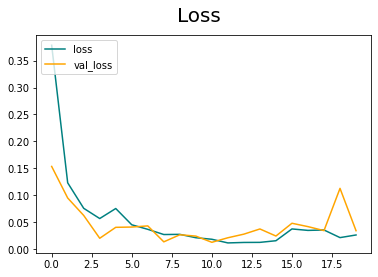

In [19]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

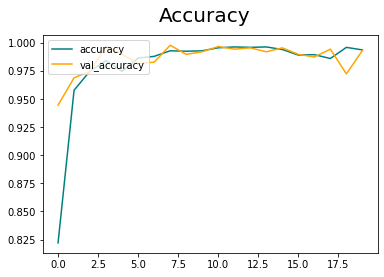

In [20]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [21]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [22]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    ypred = model.predict(X)
    pre.update_state(y, ypred)
    re.update_state(y, ypred)
    acc.update_state(y, ypred)

In [23]:
print('Exactitud-> ',acc.result(), '\nRecall -> ',re.result(), '\nPresición -> ',pre.result())

Exactitud->  tf.Tensor(0.9861111, shape=(), dtype=float32) 
Recall ->  tf.Tensor(0.97108436, shape=(), dtype=float32) 
Presición ->  tf.Tensor(1.0, shape=(), dtype=float32)


In [24]:
model.save('./CNNv2.h5')